# Pulsar Star Prediction

We will use a few machine learning algorithms to label pulsar candidates. 
The data set can be found here:
https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star 
Some of visulizations were based on the visualization that can be found here:
https://www.kaggle.com/pavanraj159/predicting-pulsar-star-in-the-universe

In [20]:
# !pip install graphviz # in case you haven't installed graphviz
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz

%matplotlib inline

In [2]:
data = pd.read_csv('pulsar_stars.csv')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
# Determine the amount of missing data
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

There is no missing data in this data set.

We will now determine the amount of data points in each class.

In [13]:
#Renaming columns
data = data.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

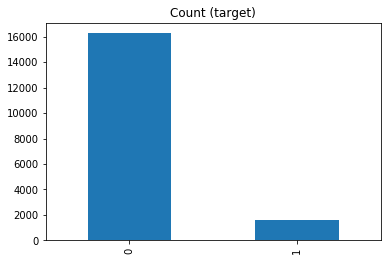

In [14]:
target_count = data.target_class.value_counts()
target_count.plot(kind='bar', title='Count (target)');

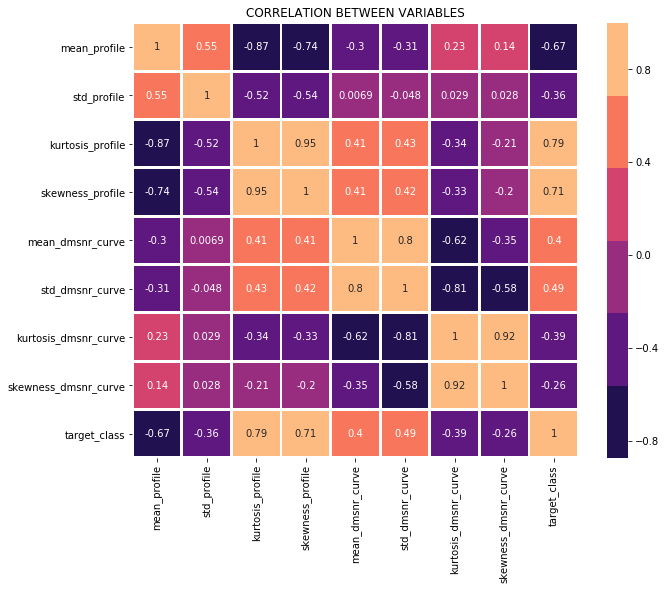

In [15]:
# we will now plot the correlation coefficient of the features

correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

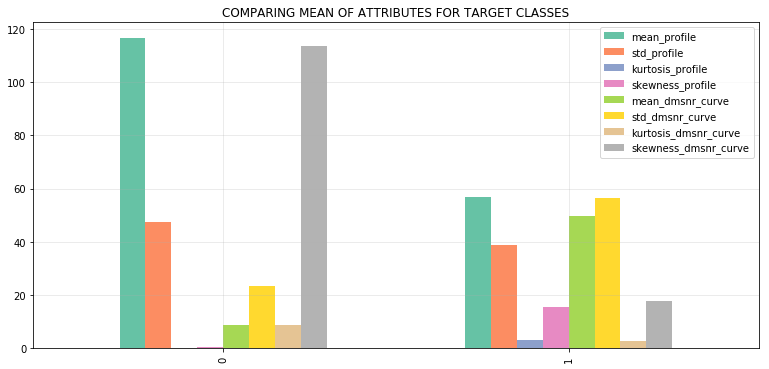

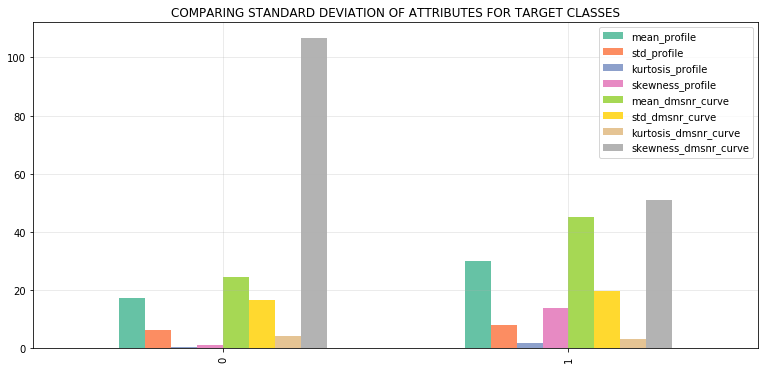

In [18]:
# We will now compare the mean and std of the target classes for each feature.

compare = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
                                        'skewness_dmsnr_curve']].mean().reset_index()


compare = compare.drop("target_class",axis =1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
                                        'skewness_dmsnr_curve']].std().reset_index()
compare1 = compare1.drop("target_class",axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.show()

C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Manvir\AppData\Local\Continuum\anacond

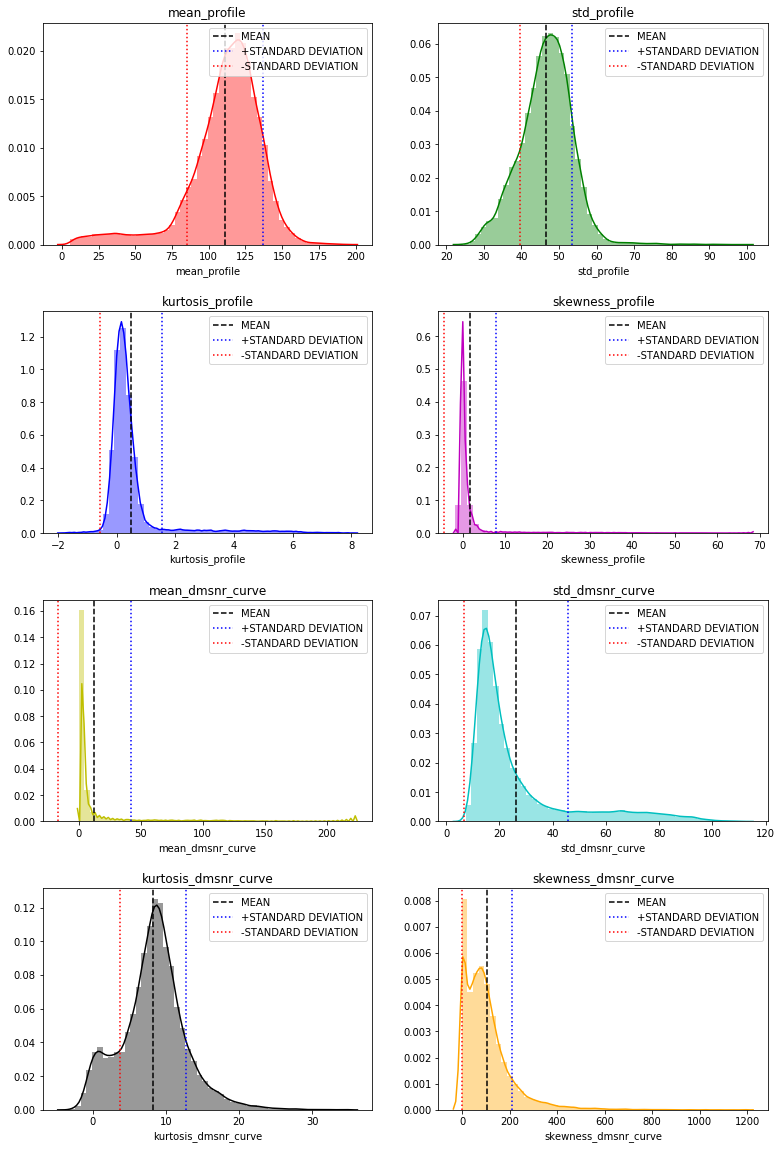

In [24]:
# We can now visualize the distributions of the features.

columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].mean()+data[i].std(),color = "b",linestyle="dotted",label="+STANDARD DEVIATION")
    plt.axvline(data[i].mean()-data[i].std(),color = "r",linestyle="dotted",label="-STANDARD DEVIATION")
    plt.legend(loc="upper right")

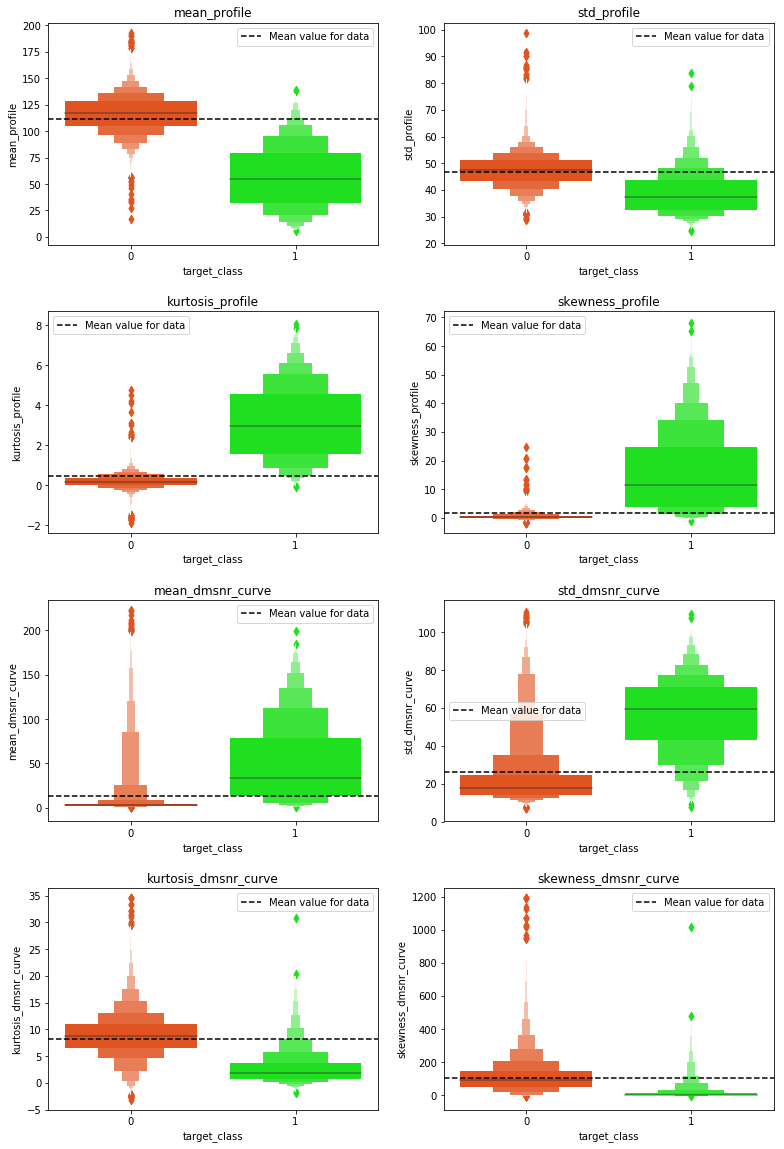

In [25]:
# We will now plot boxplots for each feature and compare the boxplots of each target class.

columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["target_class"],y=data[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

In [26]:
# Class count
count_class_0, count_class_1 = data.target_class.value_counts()
print('count_class_0: ' + str(count_class_0))
print('count_class_1: ' + str(count_class_1))

# Divide by class
data_class_0 = data[data['target_class'] == 0]
data_class_1 = data[data['target_class'] == 1]

count_class_0: 16259
count_class_1: 1639


Since we are dealing with an imbalanced data set, we need to obtain a more balanced data set. We will use under-sampling and over-sampling.

## Random under-sampling

Random under-sampling:
1    1639
0    1639
Name: target_class, dtype: int64


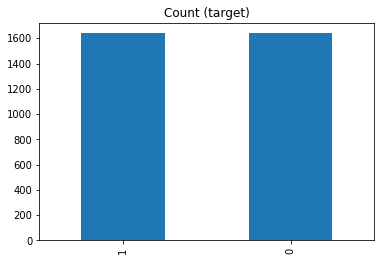

In [41]:
data_class_0_under = data_class_0.sample(count_class_1, random_state = 42)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under.target_class.value_counts())

data_test_under.target_class.value_counts().plot(kind='bar', title='Count (target)');

In [42]:
data2 = data_test_under
# split data into train and test sets
y = data2['target_class']
X = data2.drop('target_class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will now try to make predictions on the test set using Logistic Regression, Naive Bayes, Decision Tree, Random Forest and XGBoost.

### Logistic Regression

In [43]:
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9278455284552846

Confusion Matrix:
[[482  20]
 [ 51 431]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       502
           1       0.96      0.89      0.92       482

   micro avg       0.93      0.93      0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984



### Naive Bayes

In [44]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.8922764227642277

Confusion Matrix:
[[473  29]
 [ 77 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       502
           1       0.93      0.84      0.88       482

   micro avg       0.89      0.89      0.89       984
   macro avg       0.90      0.89      0.89       984
weighted avg       0.90      0.89      0.89       984



### Decision Tree

In [45]:
model = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train) 
#dot_graph = tree.export_graphviz(model)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.8963414634146342

Confusion Matrix:
[[455  47]
 [ 55 427]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       502
           1       0.90      0.89      0.89       482

   micro avg       0.90      0.90      0.90       984
   macro avg       0.90      0.90      0.90       984
weighted avg       0.90      0.90      0.90       984



### Random Forest

In [46]:
model = RandomForestClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.931910569105691

Confusion Matrix:
[[485  17]
 [ 50 432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       502
           1       0.96      0.90      0.93       482

   micro avg       0.93      0.93      0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984



### XGBoost

In [47]:
# XGBoost
model = XGBClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9136178861788617

Confusion Matrix:
[[467  35]
 [ 50 432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       502
           1       0.93      0.90      0.91       482

   micro avg       0.91      0.91      0.91       984
   macro avg       0.91      0.91      0.91       984
weighted avg       0.91      0.91      0.91       984



## Random Over sampling

Random over-sampling:
1    16259
0    16259
Name: target_class, dtype: int64


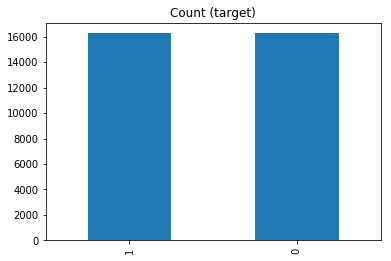

In [50]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True, random_state=42)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.target_class.value_counts())

data_test_over.target_class.value_counts().plot(kind='bar', title='Count (target)');

In [51]:
data2 = data_test_over
# split data into train and test sets
y = data2['target_class']
X = data2.drop('target_class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will now try to make predictions on the test set using Logistic Regression, Naive Bayes, Decision Tree, Random Forest and XGBoost.

### Logistic Regression

In [52]:
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9476219762197622

Confusion Matrix:
[[4830  133]
 [ 378 4415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4963
           1       0.97      0.92      0.95      4793

   micro avg       0.95      0.95      0.95      9756
   macro avg       0.95      0.95      0.95      9756
weighted avg       0.95      0.95      0.95      9756



### Naive Bayes

In [53]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9050840508405084

Confusion Matrix:
[[4676  287]
 [ 639 4154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4963
           1       0.94      0.87      0.90      4793

   micro avg       0.91      0.91      0.91      9756
   macro avg       0.91      0.90      0.90      9756
weighted avg       0.91      0.91      0.90      9756



### Decision Tree

In [54]:
model = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train) 
#dot_graph = tree.export_graphviz(model)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9894423944239442

Confusion Matrix:
[[4860  103]
 [   0 4793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4963
           1       0.98      1.00      0.99      4793

   micro avg       0.99      0.99      0.99      9756
   macro avg       0.99      0.99      0.99      9756
weighted avg       0.99      0.99      0.99      9756



### Random Forest

In [55]:
model = RandomForestClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9952849528495284

Confusion Matrix:
[[4917   46]
 [   0 4793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4963
           1       0.99      1.00      1.00      4793

   micro avg       1.00      1.00      1.00      9756
   macro avg       1.00      1.00      1.00      9756
weighted avg       1.00      1.00      1.00      9756



### XGBoost

In [56]:
model = XGBClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9908774087740877

Confusion Matrix:
[[4892   71]
 [  18 4775]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4963
           1       0.99      1.00      0.99      4793

   micro avg       0.99      0.99      0.99      9756
   macro avg       0.99      0.99      0.99      9756
weighted avg       0.99      0.99      0.99      9756

